In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'bag', 'ankle boot']

sample_size=9
random_idx = np.random.randint(60000, size=sample_size)

x_train = np.reshape(x_train / 255, (-1,28,28,1))
x_test = np.reshape(x_test / 255, (-1,28,28,1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3,
                                            random_state=777)

model  = Sequential(
    [
        Conv2D(filters=16, kernel_size=3, padding='same',
               activation='relu', input_shape=(28,28,1)),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Conv2D(filters=32, kernel_size=3, padding='same',
               activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Conv2D(filters=64, kernel_size=3, padding='same',
               activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)


model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']    
)

history = model.fit(
    x_tr, y_tr,
    epochs=30,
    batch_size =128,
    validation_data=(x_val, y_val)
)

Epoch 1/30
329/329 [==============================] - 5s 14ms/step - loss: 0.6536 - acc: 0.7654 - val_loss: 0.4466 - val_acc: 0.8406
Epoch 2/30
329/329 [==============================] - 5s 14ms/step - loss: 0.3872 - acc: 0.8608 - val_loss: 0.3408 - val_acc: 0.8788
Epoch 3/30
329/329 [==============================] - 6s 17ms/step - loss: 0.3277 - acc: 0.8808 - val_loss: 0.3488 - val_acc: 0.8744
Epoch 4/30
329/329 [==============================] - 6s 17ms/step - loss: 0.2975 - acc: 0.8930 - val_loss: 0.2994 - val_acc: 0.8953
Epoch 5/30
329/329 [==============================] - 5s 16ms/step - loss: 0.2769 - acc: 0.8986 - val_loss: 0.2821 - val_acc: 0.8977
Epoch 6/30
329/329 [==============================] - 5s 16ms/step - loss: 0.2575 - acc: 0.9051 - val_loss: 0.2636 - val_acc: 0.9028
Epoch 7/30
329/329 [==============================] - 5s 17ms/step - loss: 0.2432 - acc: 0.9114 - val_loss: 0.2956 - val_acc: 0.8930
Epoch 8/30
329/329 [==============================] - 5s 16ms/step - 

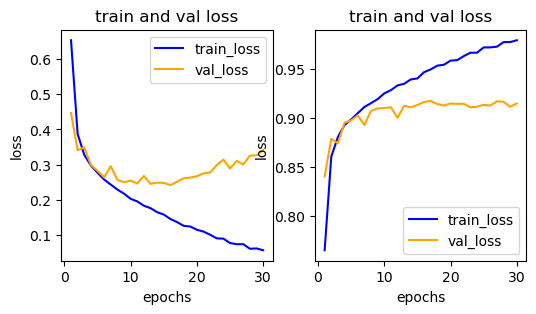

In [4]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (6, 3))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3708 - acc: 0.9102


[0.3707611560821533, 0.9101999998092651]

In [6]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

313/313 [==============================] - 1s 4ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[9.0579760e-10 1.9348538e-11 7.7094560e-11 3.7950593e-14 6.3160185e-12
 7.4954535e-08 3.1361490e-14 4.4771744e-04 9.7610132e-07 9.9955124e-01]


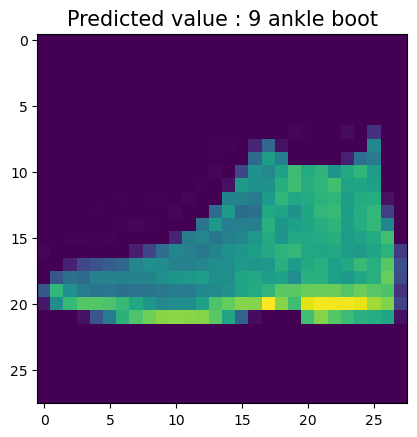

In [11]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value : ' + str(arg_results[0])+' ' + str(class_names[arg_results[0]]), fontsize = 15)
plt.show()

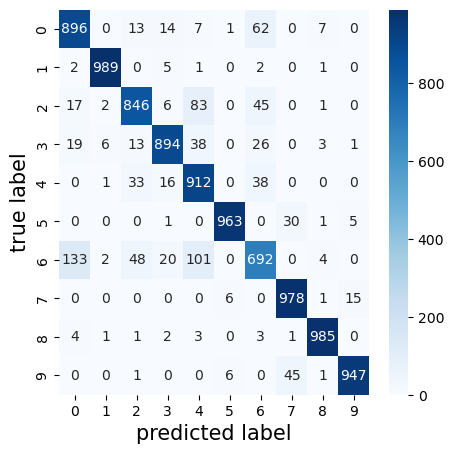

In [12]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (5,5 ))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()